<a href="https://colab.research.google.com/github/vahedshaik/Assignment4/blob/main/255datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',None)

import sklearn
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,QuantileTransformer,RobustScaler,Normalizer,MaxAbsScaler,MinMaxScaler,PowerTransformer
     

In [39]:
df = pd.read_csv('/content/grocerysales.csv')

In [40]:

df.head()
     

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [41]:

df.shape

(9994, 11)

In [42]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


Finding the columns with the null values

In [43]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
  print(feature, np.round(df[feature].isnull().mean(),4),'% missing')

Checking the Relations between missing values and sales

In [44]:
for feature in features_with_na:
  data = df.copy()
  data[feature] = np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['Sales'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [45]:
numerical_features = [ feature for feature in df.columns if df[feature].dtypes !='O']
print ("Total numerical featuress present are:{}".format(len(numerical_features)))

df[numerical_features].head()
     

Total numerical featuress present are:3


,Sales,Discount,Profit
0,1254,0.12,401.28
1,749,0.18,149.80
2,2360,0.21,165.20
3,896,0.25,89.60
4,2355,0.26,918.45


In [46]:
df.columns
     

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

Filtering the unwanted columns

In [47]:
dtfil=df[[ 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Sales', 'Discount', 'Profit', 'State']]
dtfil
     

,Customer Name,Category,Sub Category,City,Order Date,Sales,Discount,Profit,State
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,1254,0.12,401.28,Tamil Nadu
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,749,0.18,149.80,Tamil Nadu
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,2360,0.21,165.20,Tamil Nadu
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,896,0.25,89.60,Tamil Nadu
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,945,0.16,359.10,Tamil Nadu
9990,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,1195,0.26,71.70,Tamil Nadu
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,1567,0.16,501.44,Tamil Nadu
9992,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,1659,0.15,597.24,Tamil Nadu


In [48]:
dtfil.isna().sum()

Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [49]:
dtfil[dtfil['Profit'].isna()]
     

,Customer Name,Category,Sub Category,City,Order Date,Sales,Discount,Profit,State


In [50]:
dtfil.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26a191a160>,
      dtype=object)

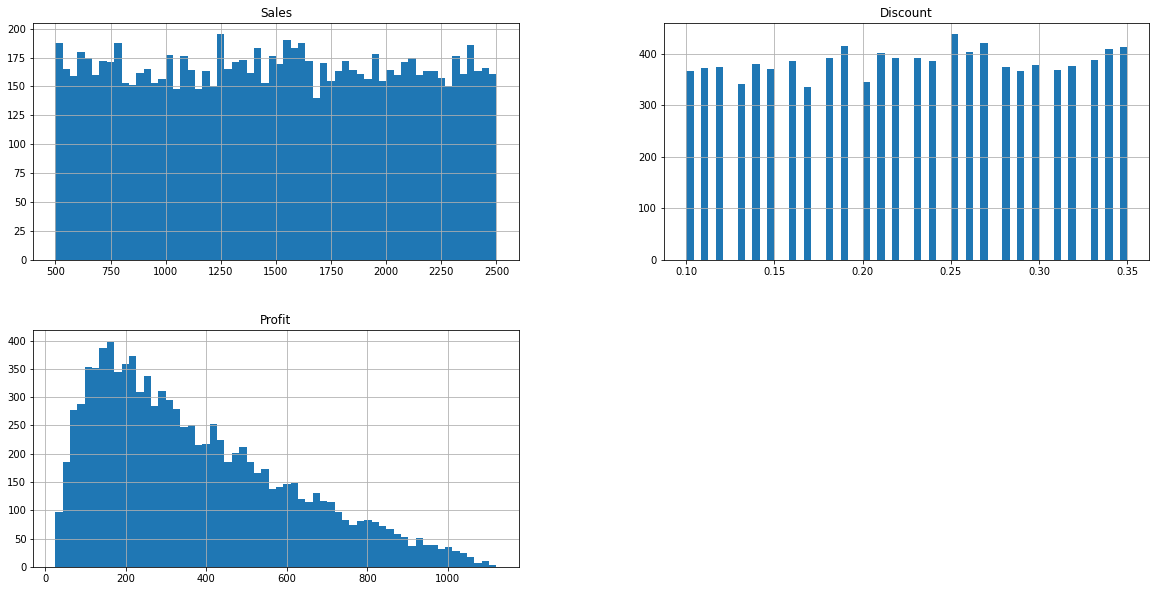

In [51]:
dtfil.hist(bins=60, figsize=(20,10))

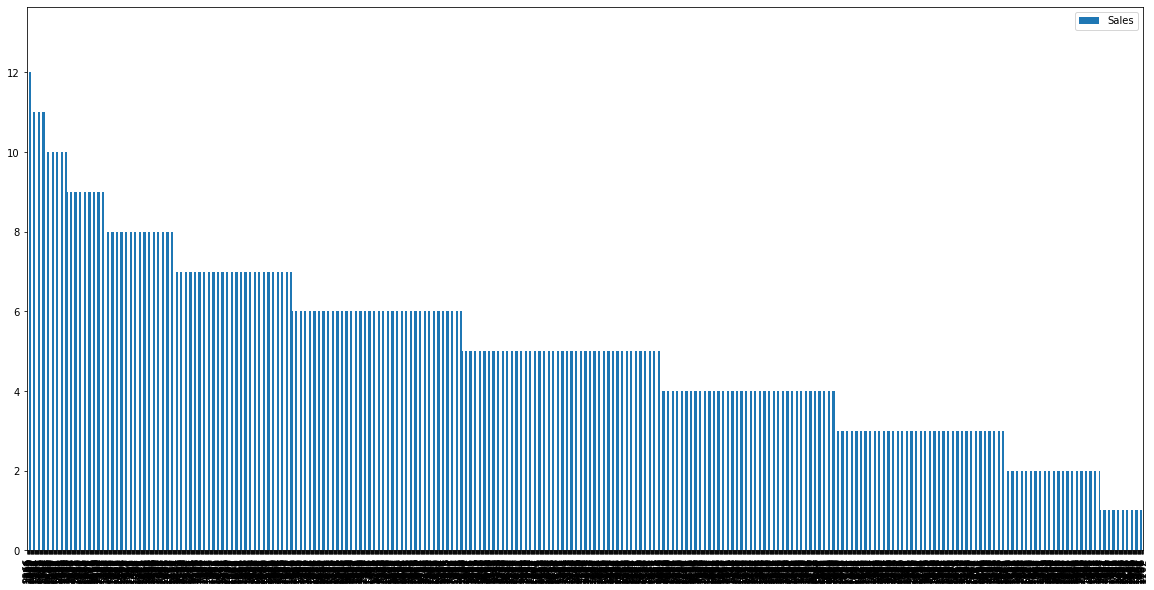

In [52]:
pd.DataFrame(dtfil['Sales'].value_counts()).plot(kind='bar', figsize=(20,10))

**Scaling the data**

Applying logarithmic transformation to normalize post so that we can get a monotonous distribution

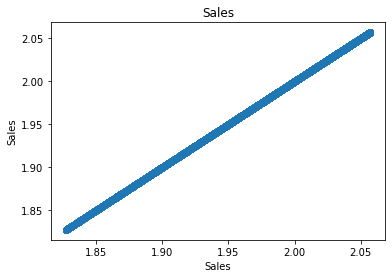

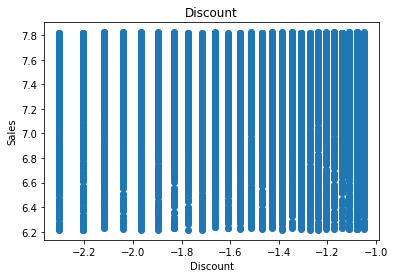

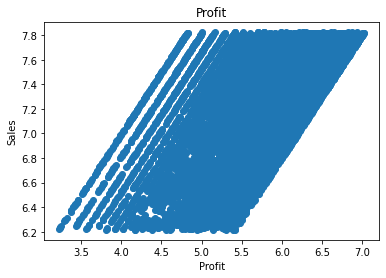

In [53]:
for feature in numerical_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data['Sales'] = np.log(data['Sales'])
    plt.scatter(data[feature],data['Sales'])
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.title(feature)
    plt.show()

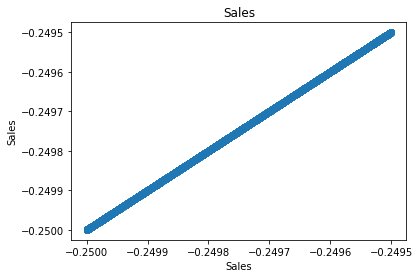

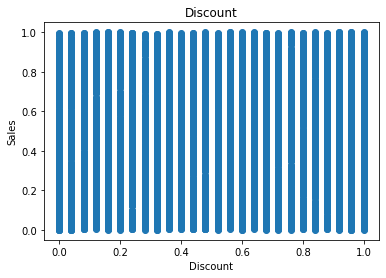

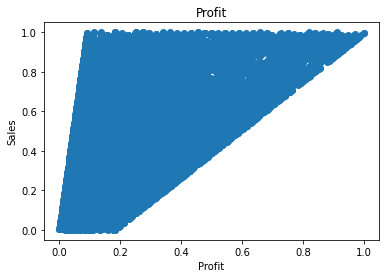

In [54]:
Sales_min = df['Sales'].min(skipna = True)
Sales_max = df['Sales'].max(skipna = True)
for feature in numerical_features:
  data = df.copy()
  feature_min = data[feature].min(skipna = True)
  feature_max = data[feature].max(skipna = True)
  data[feature] = (data[feature] - feature_min)/(feature_max-feature_min)
  data['Sales'] = (data['Sales'] - Sales_min)/(Sales_max - Sales_min)
  plt.scatter(data[feature],data['Sales'])
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.title(feature)
  plt.show()

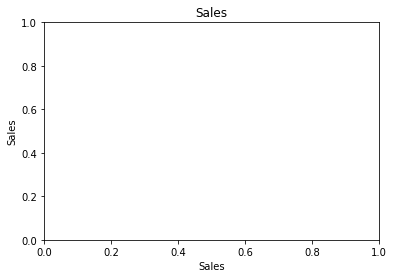

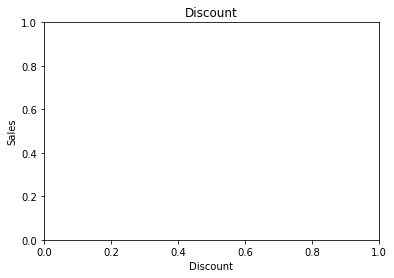

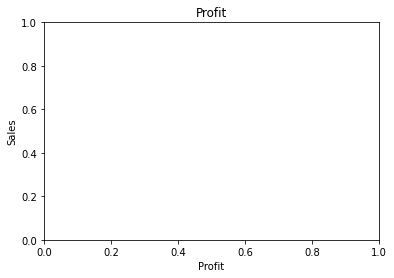

In [55]:
Sales_mean = df['Sales'].mean()
Sales_std = df['Sales'].std()
for feature in numerical_features:
  data = df.copy()
  feature_mean = df[feature].mean()
  feature_std = df[feature].std()
  data[feature] = (data[feature]-feature_mean)/feature_std
  data['Sales'] = (data['Sales']-Sales_mean)/Sales_std
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.title(feature)
  plt.show()

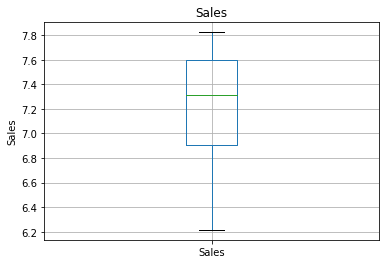

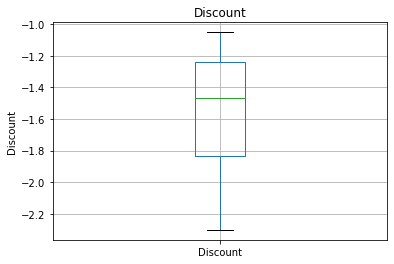

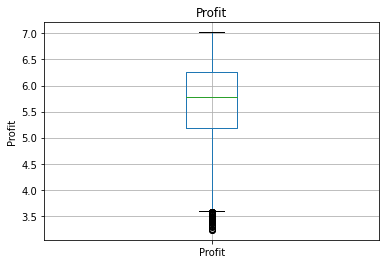

In [56]:
for feature in numerical_features:
  data = df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature] = np.log(data[feature])
    data.boxplot(column = feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [57]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(len(cat_features))
cat_features
     

8


['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Order Date',
 'Region',
 'State']

In [58]:
for feature in cat_features:
  print("The feature {} has {} different categories".format(feature,len(df[feature].unique())))

The feature Order ID has 9994 different categories
The feature Customer Name has 50 different categories
The feature Category has 7 different categories
The feature Sub Category has 23 different categories
The feature City has 24 different categories
The feature Order Date has 1236 different categories
The feature Region has 5 different categories
The feature State has 1 different categories


Finding the relationship between categorical features and the dependent feature

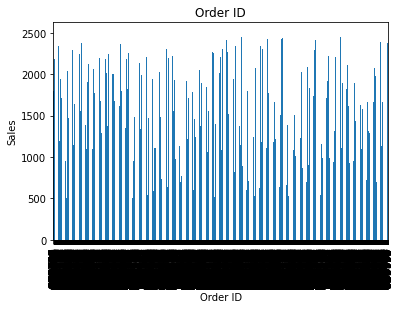

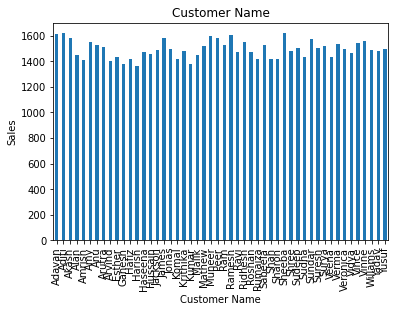

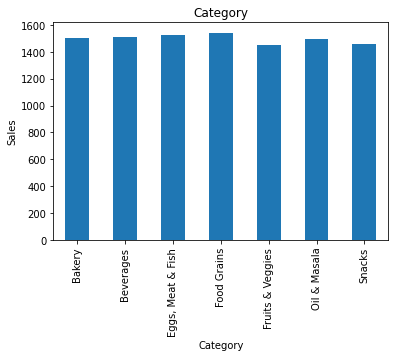

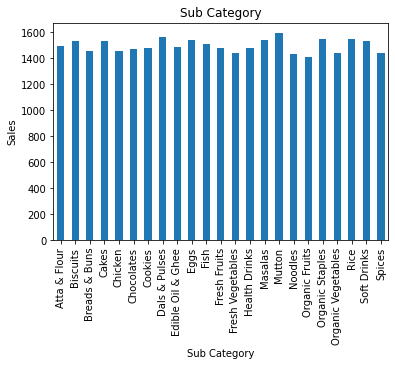

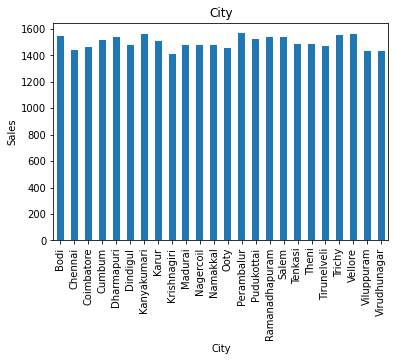

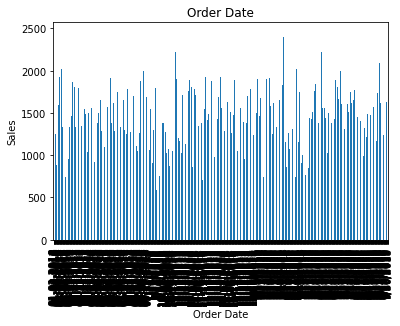

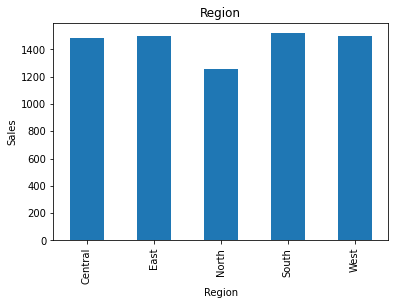

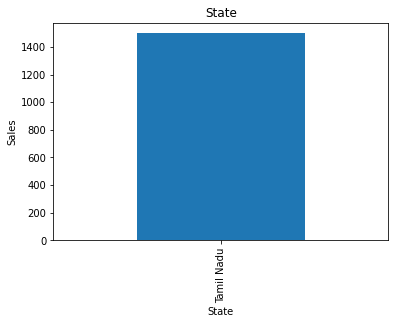

In [59]:
for feature in cat_features:
  data = df.copy()
  data.groupby(feature)['Sales'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sales')
  plt.title(feature)
  plt.show()

Handle the Missing Data

In [60]:
cat_features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes == 'O']
cat_features_nan
for feature in cat_features_nan:
  print("{} has {}% values missing".format(feature,np.round(df[feature].isnull().mean(),4)))
     

In [61]:
def replace_cat_nans(dataset,cat_features):
  data = df.copy()
  data[cat_features] = data[cat_features].fillna('null')
  return data
data = replace_cat_nans(df,cat_features_nan)
data[cat_features_nan].isnull().sum()

Series([], dtype: float64)

In [62]:
numerical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes !='O']
numerical_nan
for feature in numerical_nan:
  print("{} feature has {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [63]:
dataset = df[['Discount']].copy()

for feature in numerical_nan:
  median_val = df[feature].median()
  df[feature +'NaN'] = np.where(df[feature].isnull(),1,0)
  df[feature].fillna(median_val,inplace=True)
 

df[numerical_nan].isnull().sum()

dataset.head()

,Discount
0,0.12
1,0.18
2,0.21
3,0.25
4,0.26


Using MICE(gradient booster regressor)

In [64]:
def mice_imputation_numeric(dataset):
    numeric_imputer = IterativeImputer(GradientBoostingRegressor())
    numeric_imputed = numeric_imputer.fit_transform(dataset)
    return numeric_imputed
    print(type(numeric_imputed))
numeric_imputed_pd = mice_imputation_numeric(dataset)
     

In [65]:
print(numeric_imputed_pd)

[[0.12]
 [0.18]
 [0.21]
 ...
 [0.16]
 [0.15]
 [0.28]]


In [66]:
num_features = ['Sales', 'Profit','Discount']
for feature in num_features:
  df[feature] = np.log(df[feature])
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,7.134094,-2.120264,5.994659,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,6.618739,-1.714798,5.009301,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,7.766417,-1.560648,5.107157,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,6.797940,-1.386294,4.495355,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,7.764296,-1.347074,6.822687,Tamil Nadu


In [74]:
df.pop('Order Date')

0       11-08-2017
1       11-08-2017
2       06-12-2017
3       10-11-2016
4       10-11-2016
           ...    
9989    12/24/2015
9990    07-12-2015
9991    06-06-2017
9992    10/16/2018
9993     4/17/2018
Name: Order Date, Length: 9994, dtype: object

Feature scaling

In [75]:
features_scale = [feature for feature in df.columns if feature not in ['State']]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(df[features_scale])
     

MinMaxScaler()

In [76]:
scaler.transform(df[features_scale])


array([[0.57130854, 0.14553556, 0.7291738 ],
       [0.25110064, 0.46919224, 0.46939766],
       [0.96419302, 0.5922408 , 0.49519599],
       ...,
       [0.7097572 , 0.37517363, 0.78791842],
       [0.74520563, 0.32365668, 0.83401127],
       [0.45145075, 0.82187887, 0.49557872]])

In [78]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
y_train = df['Sales']
x_train = df.drop(['Profit'],axis = 1)

feature_selection_model = SelectFromModel(Lasso(alpha = 0.005,random_state = 0))
feature_selection_model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [79]:
feature_selection_model.get_support()

array([ True, False])

In [80]:
selected_features = x_train.columns[(feature_selection_model.get_support())]
print("total features {}".format(x_train.shape[1]))
print("selected features {}".format(len(selected_features)))
print("features with least coefficient, not needed {}".format(np.sum(feature_selection_model.estimator_.coef_ == 0)))
     

total features 2
selected features 1
features with least coefficient, not needed 1


In [81]:
selected_features

Index(['Sales'], dtype='object')

In [83]:
data=df[['Sales', 'Discount', 'Profit']]


Dimensioality reduction using PCA

In [86]:
pca = PCA(n_components = 3)
pca.fit(data)
tr_pca = pca.transform(data)
pca_data = pd.DataFrame(df[features_scale],columns = features_scale)

In [87]:
data.shape

(9994, 3)

In [88]:
tr_pca.shape

(9994, 3)

Text(0, 0.5, 'Second component PCA')

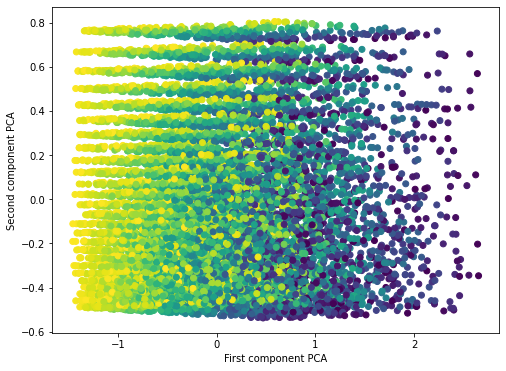

In [89]:
plt.figure(figsize = (8,6))
plt.scatter(tr_pca[:,0],tr_pca[:,1],c = data['Sales'])
plt.xlabel("First component PCA")
plt.ylabel("Second component PCA")

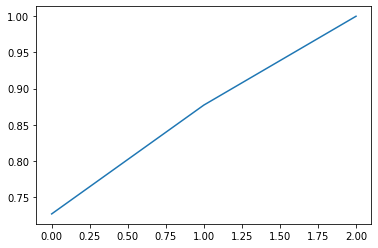

In [90]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)